In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML for Decision Trees
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz as gv

import warnings
warnings.filterwarnings("ignore")


In [6]:
#Read the dataset
df9 =pd.read_csv("/Users/mojca/Desktop/heart_disease.csv")
df9.head(15)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [3]:
"""
cp = chest pain
testbps = resting blood pressure
chol = cholesterol
fbs = fasting blood sugar
restecg = resting electrocardiography
exang = exercise induced agina
oldspeak = STdepression induced
slope = the slope of the peak exercise
ca = number of major vessel
thal = normal, fixed defext, reversible defect
target =have disease or not
"""

'\ncp = chest pain\ntestbps = resting blood pressure\nchol = cholesterol\nfbs = fasting blood sugar\nrestecg = resting electrocardiography\nexang = exercise induced agina\noldspeak = STdepression induced\nslope = the slope of the peak exercise\nca = number of major vessel\nthal = normal, fixed defext, reversible defect\ntarget =have disease or not\n'

In [9]:
#Show number of people with and without the disease
df9.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
#Show male and female
count_female = len(df9[df9.sex == 0])
count_male = len(df9[df9.sex == 1])
print('Percentage of Female: {:.2f}%'.format(count_female/(len(df9.sex))*100))

Percentage of Female: 30.44%


In [11]:
#Getting the mean
df9.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


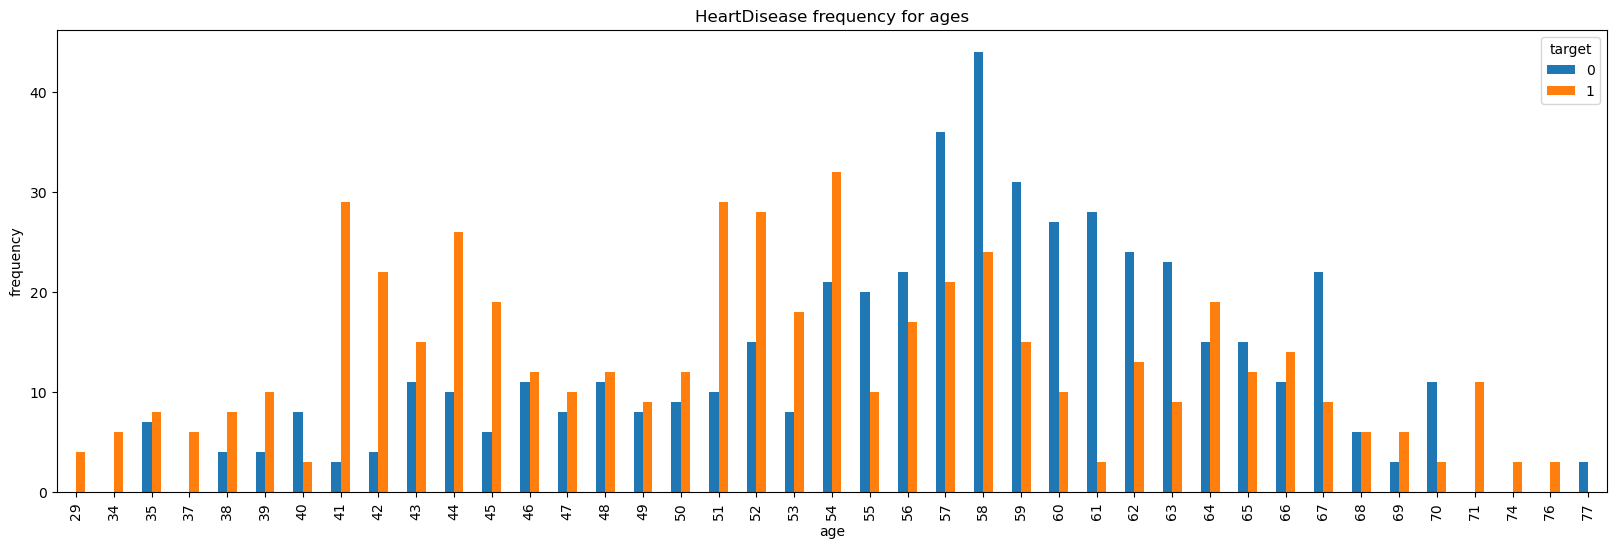

In [13]:
#Data visualisation of heart disease frequency for age
pd.crosstab(df9.age, df9.target).plot(kind='bar', figsize=(20,6))
plt.title('HeartDisease frequency for ages')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

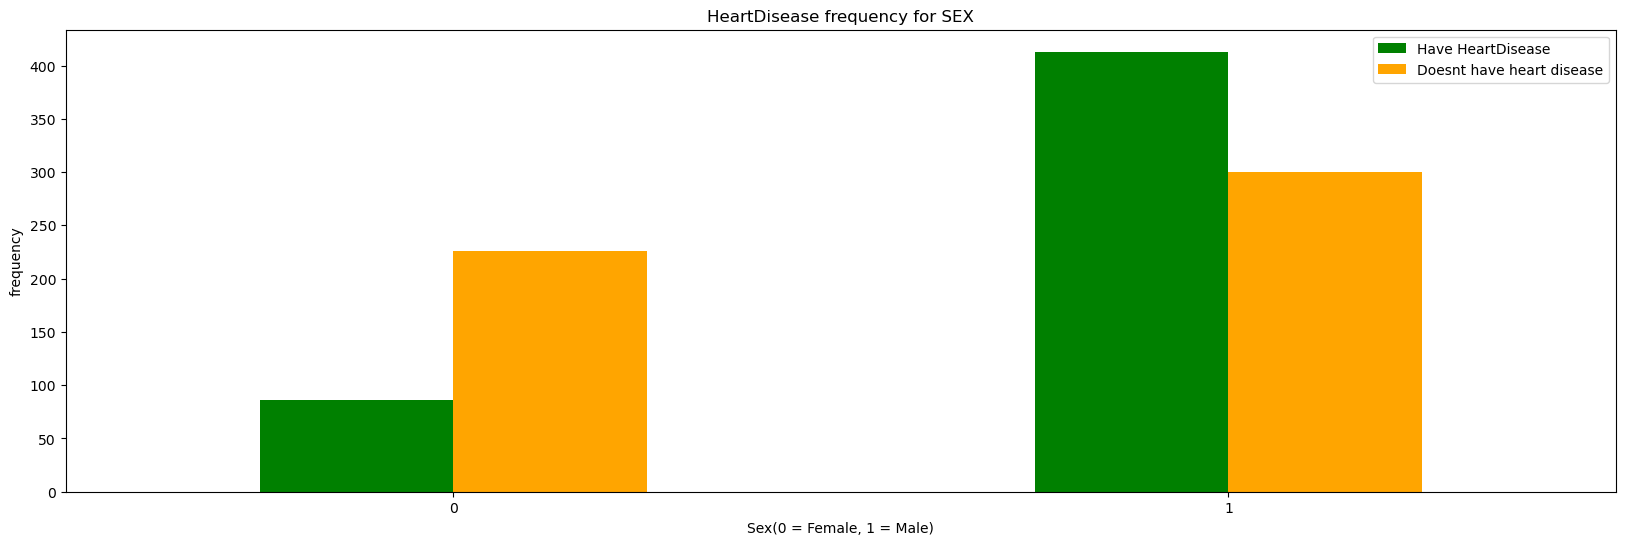

In [14]:
#Data visualisation of heart disease frequency for sex
pd.crosstab(df9.sex, df9.target).plot(kind='bar', figsize=(20,6), color=['#008000', '#FFA500'])
plt.title('HeartDisease frequency for SEX')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.legend(['Have HeartDisease', 'Doesnt have heart disease'])
plt.ylabel('frequency')
plt.xticks(rotation=0)
plt.show()

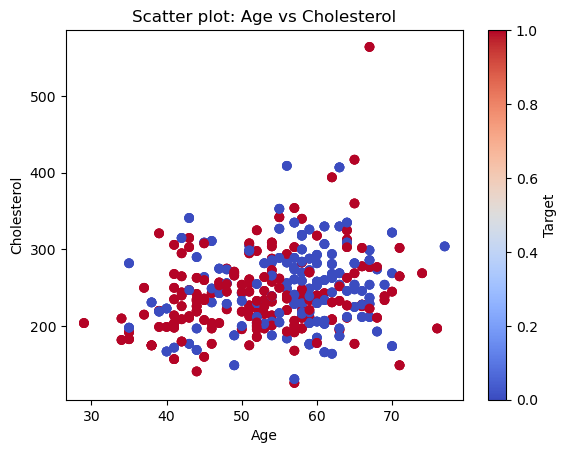

In [15]:
#Data visualisation of heart disease frequency for sex
age = df9['age']
chol = df9['chol']

plt.scatter(age, chol, c=df9['target'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Scatter plot: Age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [16]:
#Categorical variable of the dataset:
cat = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
#Numerical variable of the dataset:
num = ['age','trestbps','chol','thalach','oldpeak']

In [18]:
all_numeric = df9[num]
cor = all_numeric.corr()

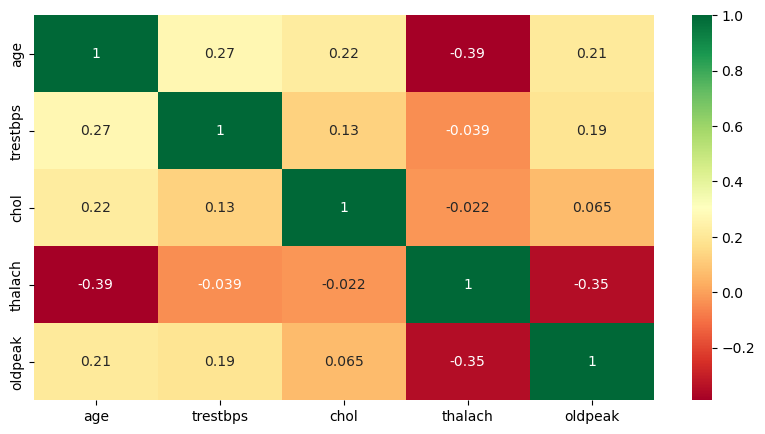

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(cor,cmap = "RdYlGn",annot=True)
plt.show()



array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

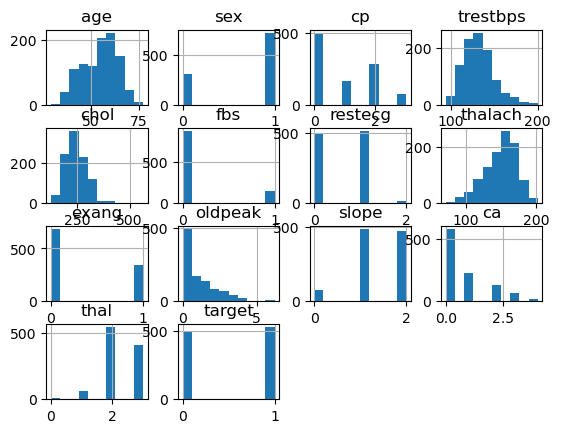

In [21]:
# Explore the distributions of the variables
df9.hist()

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

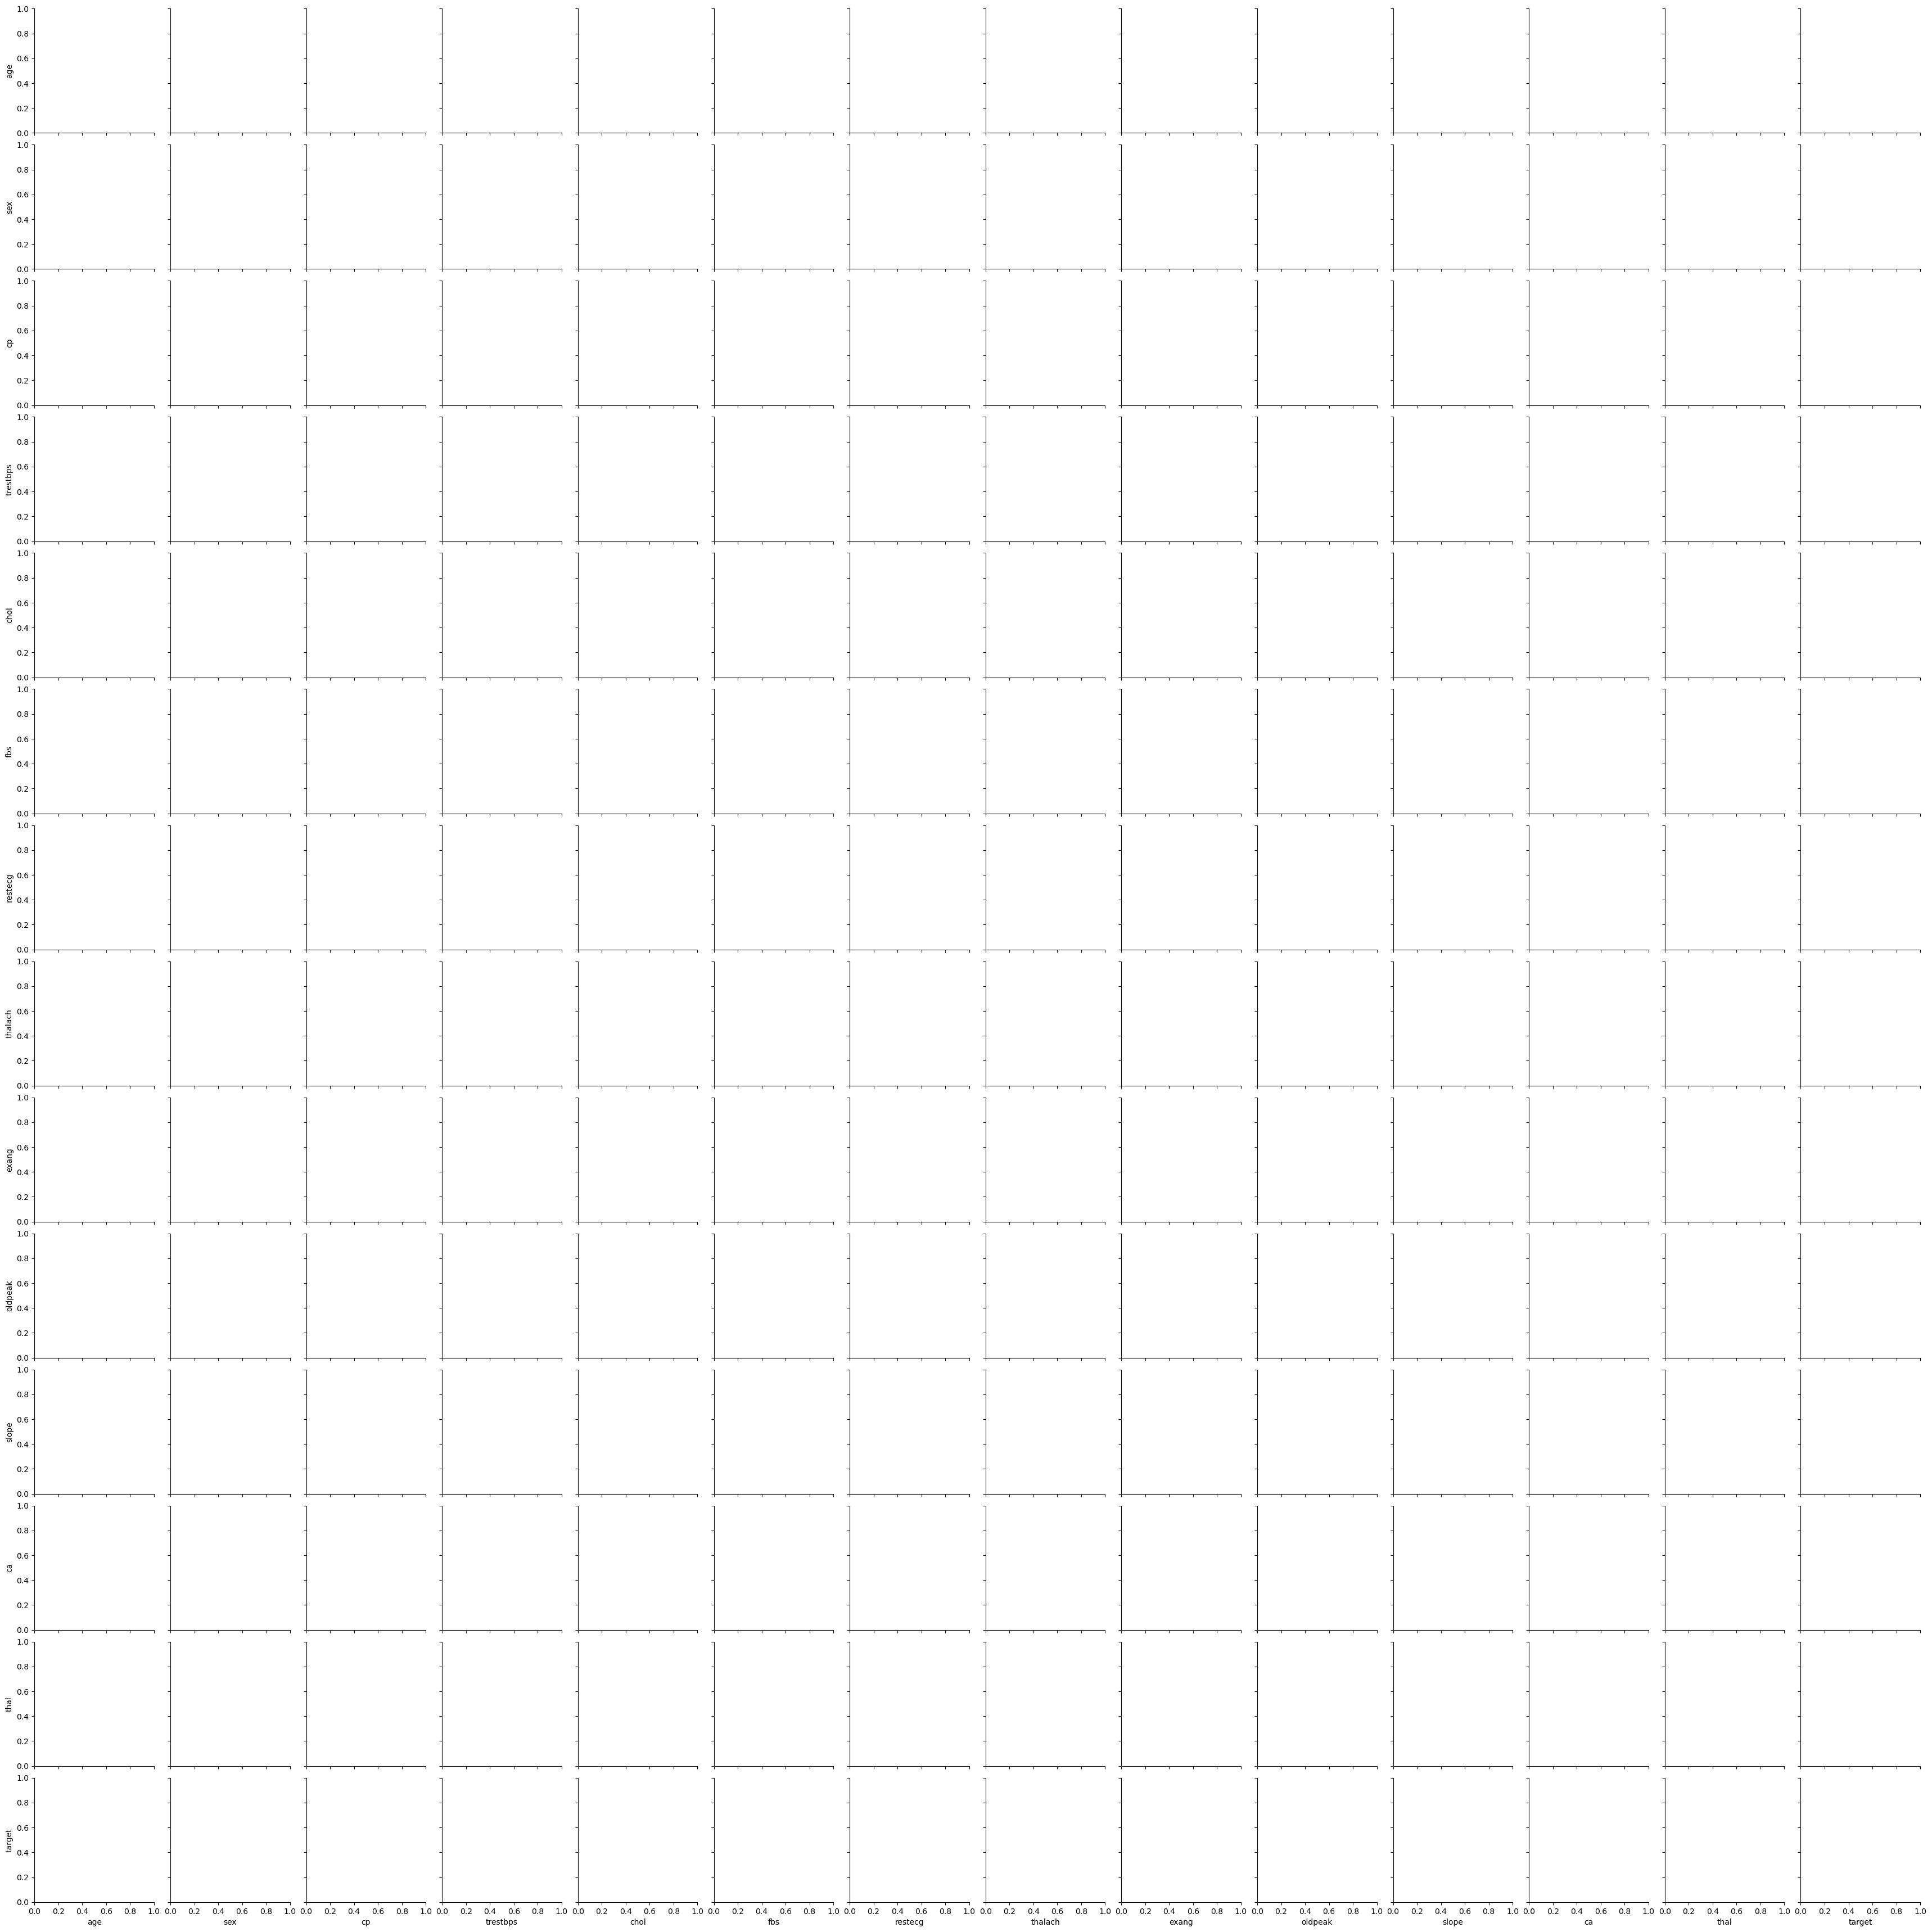

In [51]:
# Plot the relationships between the variables
sns.pairplot(df9)

In [ ]:
# Split the data into train, test, and validation sets
X = df9.drop('target', axis=1)
y = df9['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
# Display the columns of the different sets
print('Shape in train set:', X_train.shape)
print('Shape in test set:', X_test.shape)
print('Shape in validation set:', X_val.shape)


# Training the model using Decision Tree Classifier

In [18]:
# Train the classifier on the train set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target


In [27]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Define and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test set:', accuracy)

Accuracy on test set: 1.0


In [20]:
# Evaluate the classifier on the validation set
y_pred_val = clf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print('Accuracy on validation set:', accuracy_val)

Accuracy on validation set: 0.9463414634146341


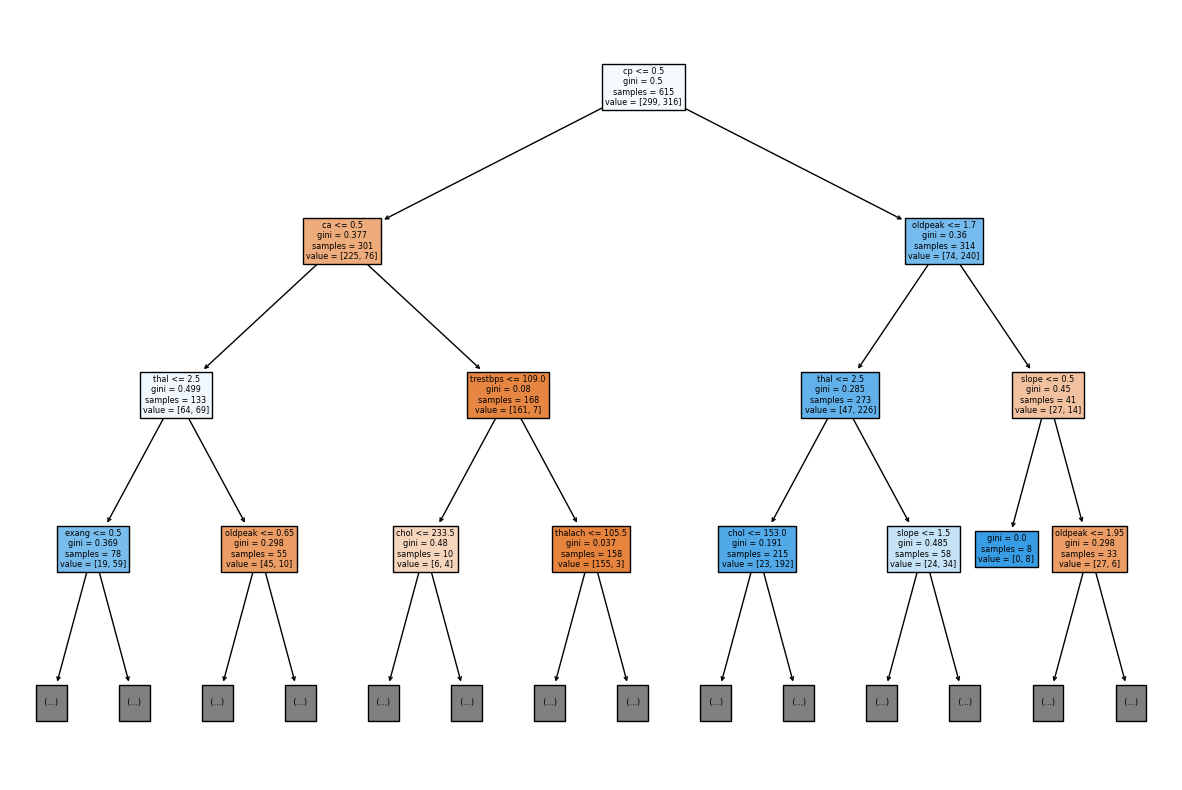

In [21]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_train.columns, max_depth=3, filled=True)
plt.show()

In [33]:
# Convert NumPy array to DataFrame
df_train = pd.DataFrame(X_train, columns=iris.feature_names)


In [35]:
# Export decision tree to a dot file
dot_data = export_graphviz(clf, feature_names=df_train.columns, filled=True)


In [42]:
# Create a graph object from the dot data
graph = gv.Source(dot_data)

In [47]:
dot_data = export_graphviz(clf, feature_names=iris.feature_names, filled=True)

In [48]:
# Save the graph as a PNG file
from graphviz import Source

graph = Source(dot_data)
graph.format = 'png'
graph.render('heart_decision_tree')


'heart_decision_tree.png'

In [49]:
# Save the graph as a PNG file
graph.render('heart_decision_tree.png')

'heart_decision_tree.png.png'

In [50]:
# Save the dot file
with open('heart_decision_tree.dot', 'w') as f:
    f.write(dot_data)
